In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=500

import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('E:/DataScience_Study/3months/Data-Lit/week6-Supervised/sandp500/all_stocks_5yr.csv')

In [13]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.070,15.120,14.630,14.750,8407500,AAL
1,2013-02-11,14.890,15.010,14.260,14.460,8882000,AAL
2,2013-02-12,14.450,14.510,14.100,14.270,8126000,AAL
3,2013-02-13,14.300,14.940,14.250,14.660,10259500,AAL
4,2013-02-14,14.940,14.960,13.160,13.990,31879900,AAL


In [14]:
#Getting a statistical summary of the data is also quite easy. This is where the `describe` function comes in:

pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,open,high,low,close,volume
count,619029.000,619032.000,619032.000,619040.000,619040.000
mean,83.023,83.778,82.256,83.044,4321823.396
std,97.379,98.208,96.507,97.390,8693609.512
min,1.620,1.690,1.500,1.590,0.000
25%,40.220,40.620,39.830,40.245,1070320.500
50%,62.590,63.150,62.020,62.620,2082093.500
75%,94.370,95.180,93.540,94.410,4284509.250
max,2044.000,2067.990,2035.110,2049.000,618237630.000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
date      619040 non-null object
open      619029 non-null float64
high      619032 non-null float64
low       619032 non-null float64
close     619040 non-null float64
volume    619040 non-null int64
Name      619040 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [34]:
df.shape

(619040, 7)

In [35]:
df1 = df.copy()


In [36]:
m = np.mean(df1.open)
s = np.std(df1.open)
df1 = df1[df1['open'] <= m + 2*s]
df1 = df1[df1['open'] >= m - 2*s]
df1.shape

(605238, 7)

In [37]:
m = np.mean(df1.close)
s = np.std(df1.close)
df1 = df1[df1['close'] <= m + 2*s]
df1 = df1[df1['close'] >= m - 2*s]
df1.shape

(572932, 7)

In [38]:
m = np.mean(df1.volume)
s = np.std(df1.volume)
df1 = df1[df1['volume'] <= m + 2*s]
df1 = df1[df1['volume'] >= m - 2*s]
df1.shape

(556769, 7)

In [42]:
df1['date'] = pd.to_datetime(df1.date)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556769 entries, 0 to 619039
Data columns (total 7 columns):
date      556769 non-null datetime64[ns]
open      556769 non-null float64
high      556769 non-null float64
low       556769 non-null float64
close     556769 non-null float64
volume    556769 non-null int64
Name      556769 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 34.0+ MB


In [43]:
df1.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [59]:
corr_mat = df1.corr()

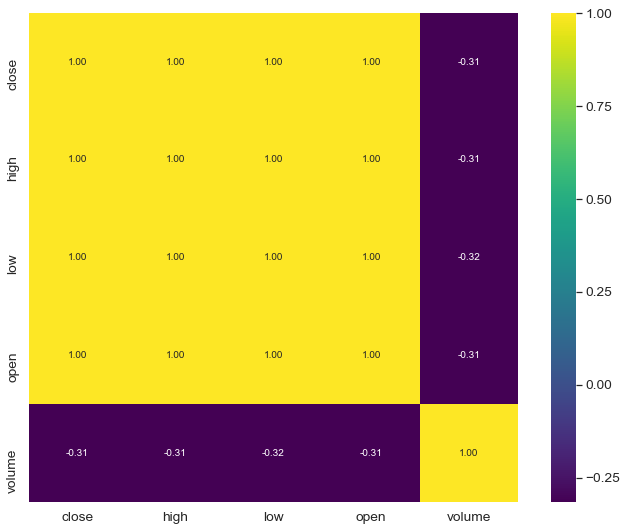

In [62]:
k=5
plt.figure(figsize=(12,9))
cols = corr_mat.nlargest(k, 'close')['close'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, annot=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values, cmap="viridis", square=True)

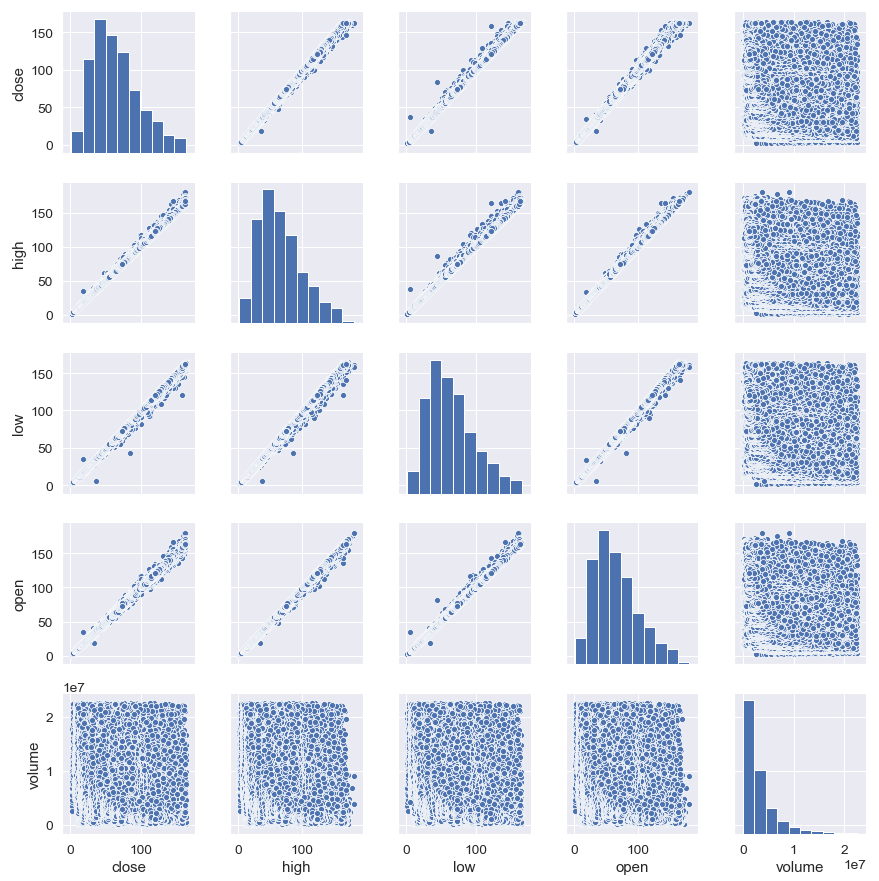

In [63]:
cols = ['close', 'high', 'low', 'open', 'volume']
sns.pairplot(df1[cols], height=2.5)

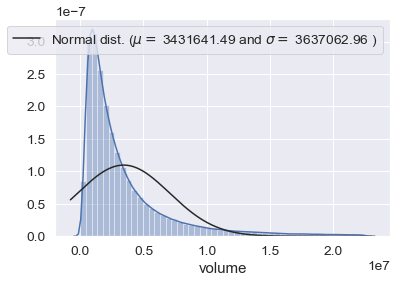

Skewness: 2.331043


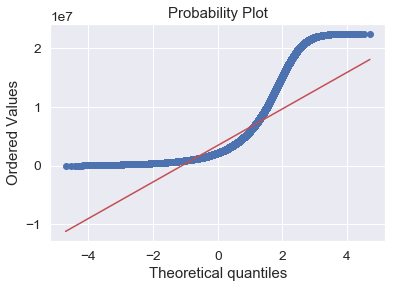

In [69]:
from scipy.stats import norm
sns.distplot(df1['volume'], fit=norm)
mu, sigma = norm.fit(df1.volume) # for getting mean and std. deviation
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.show()
print("Skewness: %f" % df1['volume'].skew())

from scipy import stats
stats.probplot(df1['volume'], plot=plt)
plt.show()

In [70]:
df1['volume'] = np.log(df1['volume'])

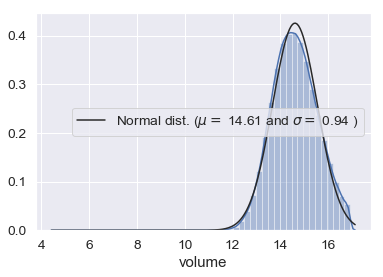

Skewness: 0.080267


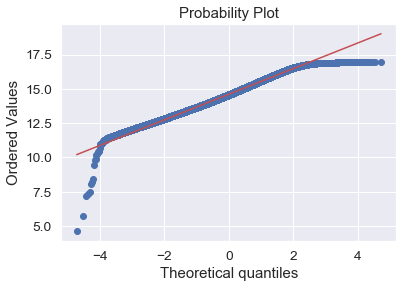

In [71]:
from scipy.stats import norm
sns.distplot(df1['volume'], fit=norm)
mu, sigma = norm.fit(df1.volume) # for getting mean and std. deviation
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.show()
print("Skewness: %f" % df1['volume'].skew())

from scipy import stats
stats.probplot(df1['volume'], plot=plt)
plt.show()

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556769 entries, 0 to 619039
Data columns (total 7 columns):
date      556769 non-null datetime64[ns]
open      556769 non-null float64
high      556769 non-null float64
low       556769 non-null float64
close     556769 non-null float64
volume    556769 non-null float64
Name      556769 non-null object
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 54.0+ MB


In [79]:
df1['volume'] = df1['volume'].astype('int64') # convert to int
df1['open'] = df1['open'].astype('int64')
df1['high'] = df1['high'].astype('int64')
df1['low'] = df1['low'].astype('int64')
df1['close'] = df1['close'].astype('int64')

In [88]:
df1['date'] = pd.to_numeric(df['date'], errors='coerce')


In [89]:
from sklearn.model_selection import train_test_split
X = df1.drop(['close','Name'], axis=1) 
y = df1['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [90]:
def adjusted_rsquare(r2, n, k):
    return 1 - ((1 - r2)*((n-1)/(n-(k+1))))

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def predict_metrics(model, x, y):
    pred = model.predict(x)
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    r2 = r2_score(y, pred)
    r2_adjusted = adjusted_rsquare(r2, x.shape[0], x.shape[1])
    return mse, mae, r2, r2_adjusted

In [92]:
from sklearn.linear_model import LinearRegression

linR = LinearRegression(normalize=True).fit(X_train, y_train)
multi_intercept = linR.intercept_
multi_coeffs = dict(zip(X, linR.coef_))

print("Intercept: ", multi_intercept)
print("coefficients: ", multi_coeffs)

Intercept:  0.050080628692299456
coefficients:  {'date': 3.0574527902086534e-20, 'open': -0.28551458754897535, 'high': 0.651859541198807, 'low': 0.6336605733294461, 'volume': -0.005892573574671128}


In [93]:
# calculate error matrix:
mse_train, mae_train, r2_train, r2_train_adjusted = predict_metrics(linR, X_train, y_train)
print("train mse:", mse_train," train mae:", mae_train," R2-train", r2_train,"R2-train_adjusted", r2_train_adjusted)
mse_test, mae_test, r2_test, r2_test_adjusted = predict_metrics(linR, X_test, y_test)
print("test mse:", mse_test," test mae:", mae_test," R2-test", r2_test,"R2-test_adjusted",r2_test_adjusted)

train mse: 0.32772192992605464  train mae: 0.433197582439905  R2-train 0.9997147099632177 R2-train_adjusted 0.9997147067606551
test mse: 0.3286814527567573  test mae: 0.43373854310032933  R2-test 0.9997142550125698 R2-test_adjusted 0.9997142421814015


# Ridge

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [95]:
print(ridge_regressor.best_score_) 
print(ridge_regressor.best_params_ )

-0.32786438543483865
{'alpha': 20}


In [96]:
best_model = ridge_regressor.best_estimator_

mse_train, mae_train, r2_train, r2_train_adjusted = predict_metrics(ridge_regressor, X_train, y_train)
print("train mse:", mse_train," train mae:", mae_train," R2-train:", r2_train, "R2-train_adjusted:", r2_train_adjusted)

mse_test, mae_test, r2_test, r2_test_adjusted = predict_metrics(ridge_regressor, X_test, y_test)
print("test mse:", mse_test," test mae:", mae_test," R2-test", r2_test," R2-test_adjusted:", r2_test_adjusted)

train mse: 0.3277219345050137  train mae: 0.4332007281997916  R2-train: 0.9997147099592315 R2-train_adjusted: 0.999714706756669
test mse: 0.3286811281813464  test mae: 0.4337415207563104  R2-test 0.9997142552947451  R2-test_adjusted: 0.9997142424635894


# Lasso

In [100]:
from sklearn.linear_model import Lasso

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso = Lasso()

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5 )
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [101]:
print(lasso_regressor.best_score_) 
print(lasso_regressor.best_params_ )

-0.6462899670442961
{'alpha': 0.01}


In [102]:
best_model = lasso_regressor.best_estimator_

mse_train, mae_train, r2_train, r2_train_adjusted = predict_metrics(lasso_regressor, X_train, y_train)
print("train mse:", mse_train," train mae:", mae_train," R2-train:", r2_train, "R2-train_adjusted:", r2_train_adjusted)

mse_test, mae_test, r2_test, r2_test_adjusted = predict_metrics(lasso_regressor, X_test, y_test)
print("test mse:", mse_test," test mae:", mae_test," R2-test", r2_test," R2-test_adjusted:", r2_test_adjusted)

train mse: 0.6462408234763166  train mae: 0.5423196445475481  R2-train: 0.9994374313969729 R2-train_adjusted: 0.9994374250817817
test mse: 0.6414327486301485  test mae: 0.5401553488070925  R2-test 0.999442359186509  R2-test_adjusted: 0.9994423341460587


# Elastic Net

In [103]:
from sklearn.linear_model import ElasticNet

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

elasticNet = ElasticNet()

elasticNet_regressor = GridSearchCV(elasticNet, parameters, scoring='neg_mean_squared_error', cv=5 )
elasticNet_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [104]:
print(lasso_regressor.best_score_) 
print(lasso_regressor.best_params_ )

-0.6462899670442961
{'alpha': 0.01}


In [105]:
best_model = elasticNet_regressor.best_estimator_

mse_train, mae_train, r2_train, r2_train_adjusted = predict_metrics(elasticNet_regressor, X_train, y_train)
print("train mse:", mse_train," train mae:", mae_train," R2-train:", r2_train, "R2-train_adjusted:", r2_train_adjusted)

mse_test, mae_test, r2_test, r2_test_adjusted = predict_metrics(elasticNet_regressor, X_test, y_test)
print("test mse:", mse_test," test mae:", mae_test," R2-test", r2_test," R2-test_adjusted:", r2_test_adjusted)

train mse: 0.45441957753434875  train mae: 0.49466204257231194  R2-train: 0.9996044165307502 R2-train_adjusted: 0.9996044120900736
test mse: 0.45206155806521015  test mae: 0.4940758537824614  R2-test 0.999606992353406  R2-test_adjusted: 0.9996069747056868
